In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
data = pd.read_csv('data/los_data.csv')

In [5]:
data = data.drop(columns=['ROW_ID','SUBJECT_ID','HADM_ID'])

In [6]:
data['AGE'] =data['AGE'].round().astype(int)
data

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78,FALL,Morning,WHITE
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88,WINTER,Evening,WHITE
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19,SPRING,Evening,WHITE
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,84,SPRING,Evening,WHITE


In [7]:
data = data[data['AGE']>=0]

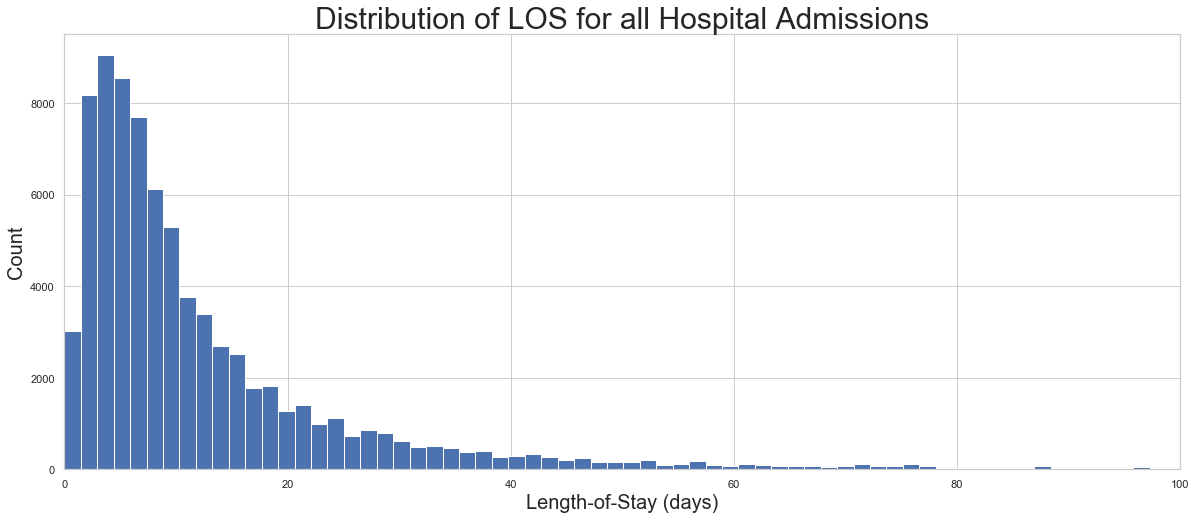

In [172]:
#LOS Distribution
plt.figure(figsize=(20,8))
plt.hist(data['Target_LOS'], bins = 200)
plt.xlim(0,100)
plt.title('Distribution of LOS for all Hospital Admissions',size=30)
plt.ylabel('Count',size=20)
plt.xlabel('Length-of-Stay (days)',size = 20);

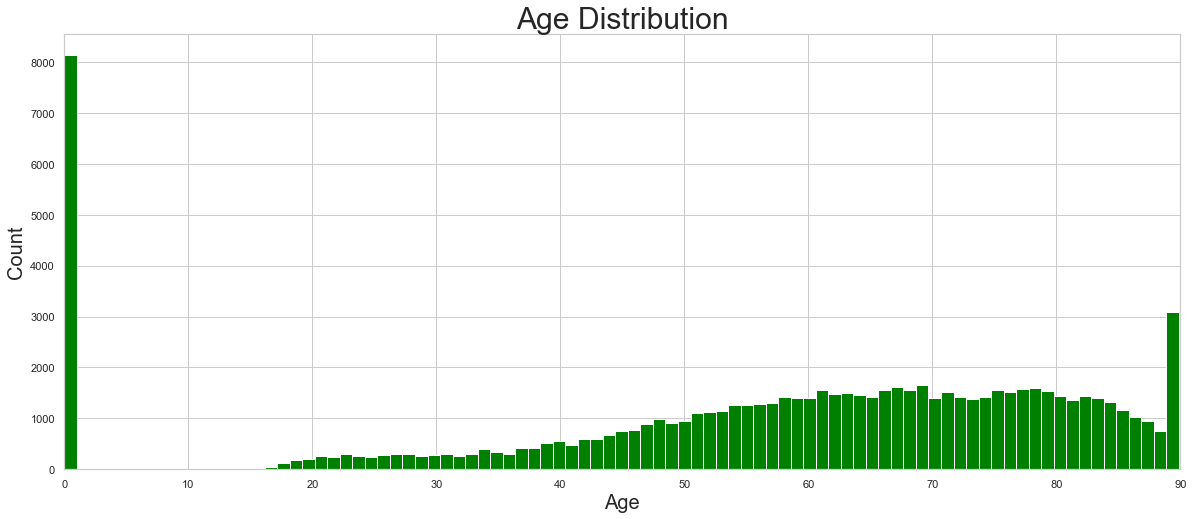

In [173]:
#AGE Distribution
plt.figure(figsize=(20,8))
plt.hist(data['AGE'], bins = 100,color='green')
plt.xlim(0,90)
plt.title('Age Distribution',size=30)
plt.ylabel('Count',size=20)
plt.xlabel('Age',size = 20);

In [183]:
data.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE


(0, 60)

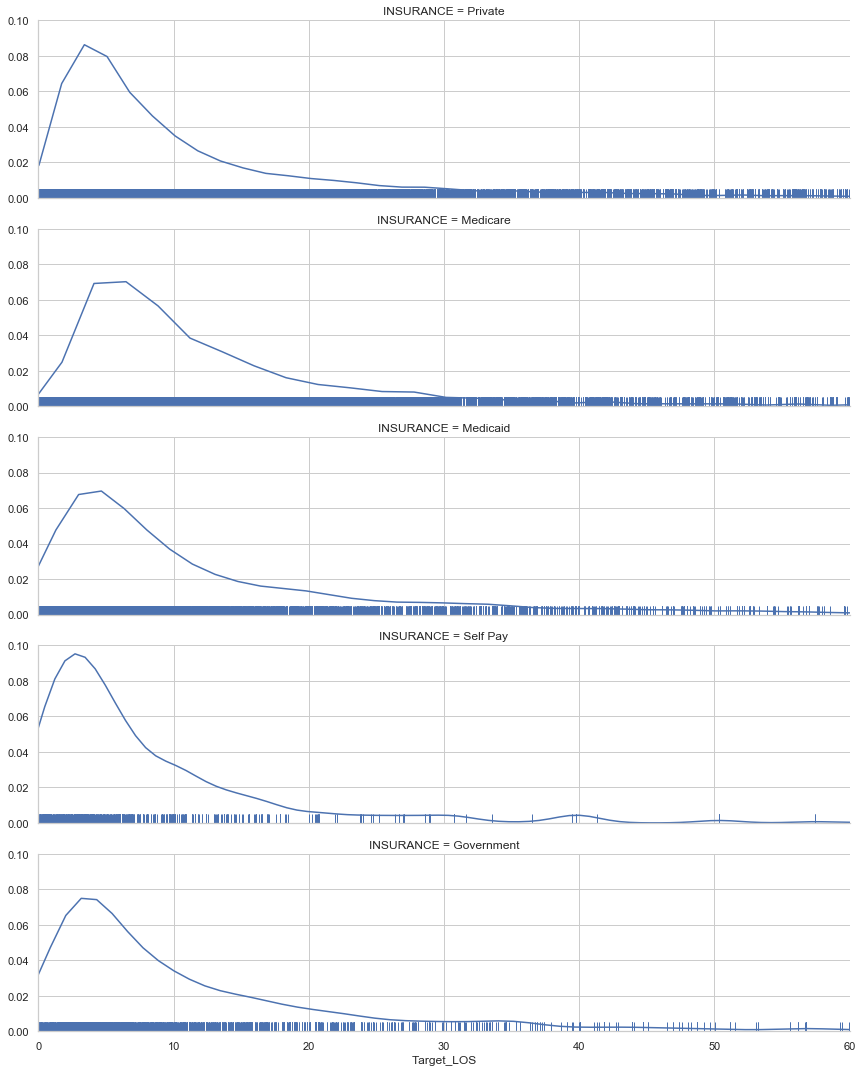

In [203]:
sns.FacetGrid(data,row='INSURANCE',height=3,aspect=4).map(sns.distplot,'Target_LOS',hist=False,rug=True)
plt.xlim(0,60)

(0, 60)

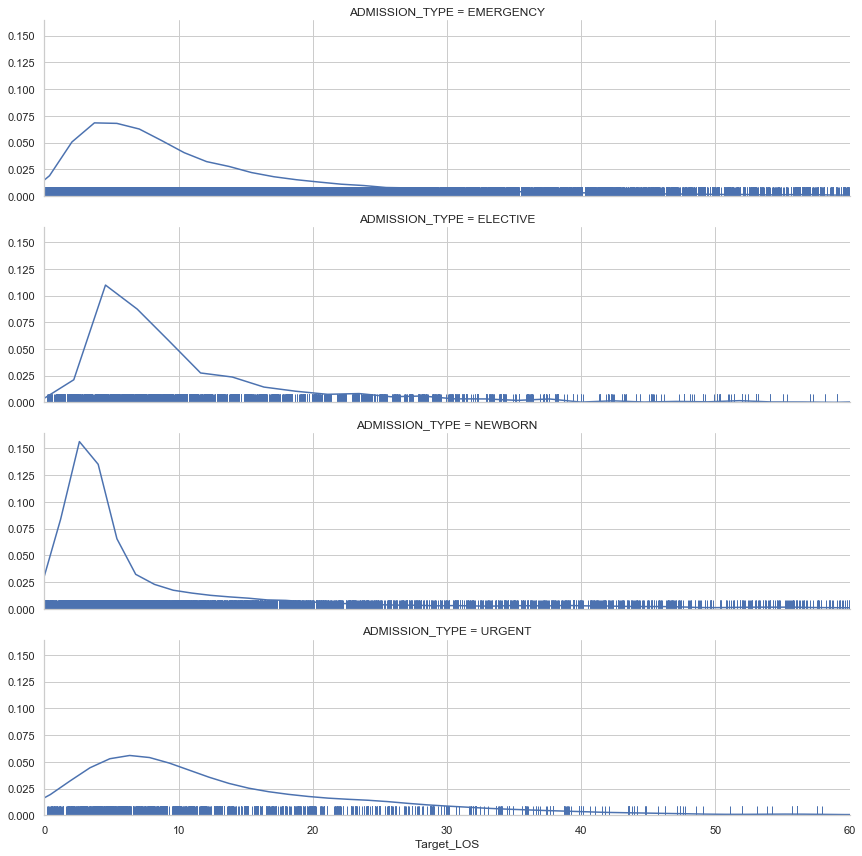

In [204]:
sns.FacetGrid(data,row='ADMISSION_TYPE',height=3,aspect=4).map(sns.distplot,'Target_LOS',hist=False,rug=True)
plt.xlim(0,60)

(0, 60)

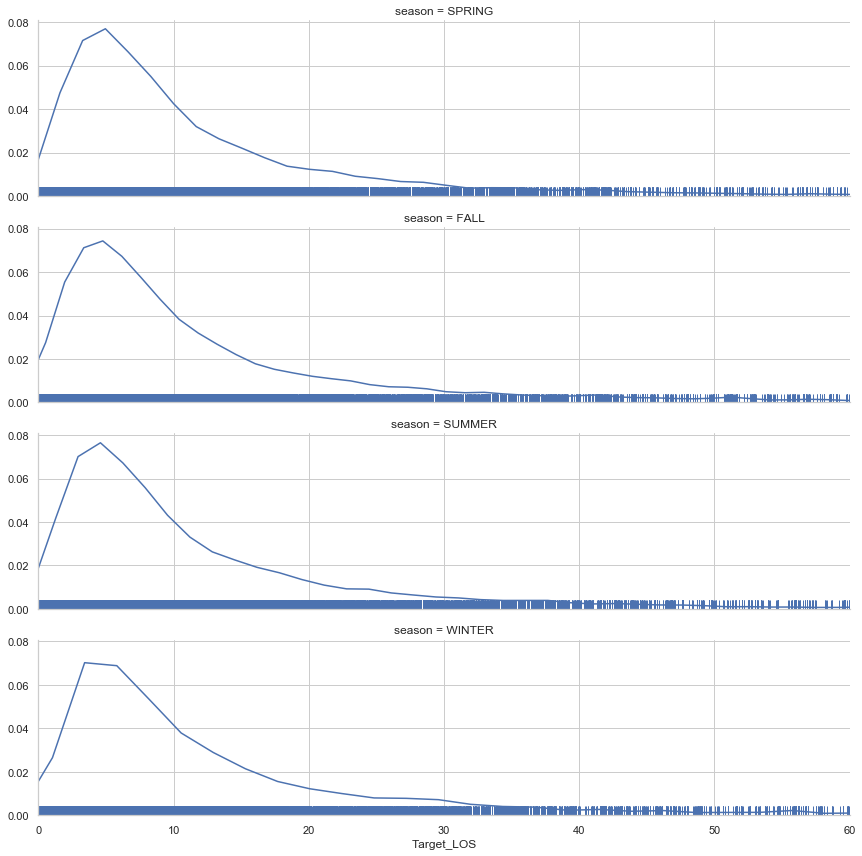

In [205]:
sns.FacetGrid(data,row='season',height=3,aspect=4).map(sns.distplot,'Target_LOS',hist=False,rug=True)
plt.xlim(0,60)

In [206]:
data.head()

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE


In [8]:
def age_range(x):
    if x <20:
        return 'Under 20'
    elif x>=20 and x<40:
        return 'Between 20 and 40'
    elif x >=40 and x<60:
        return 'Between 40 and 60'
    else:
        return 'Over 60'
data['age_range']=data['AGE'].apply(age_range)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [9]:
data.groupby('age_range').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                           ).round(3).stack().to_frame().reset_index()\
.rename(columns={'level_1':'aggregate',0:'values'})

,age_range,aggregate,values
0,Between 20 and 40,Mean,14.878
1,Between 20 and 40,Median,6.958
2,Between 40 and 60,Mean,14.618
3,Between 40 and 60,Median,8.258
4,Over 60,Mean,12.860
5,Over 60,Median,8.730
6,Under 20,Mean,11.636
7,Under 20,Median,4.142


(0, 60)

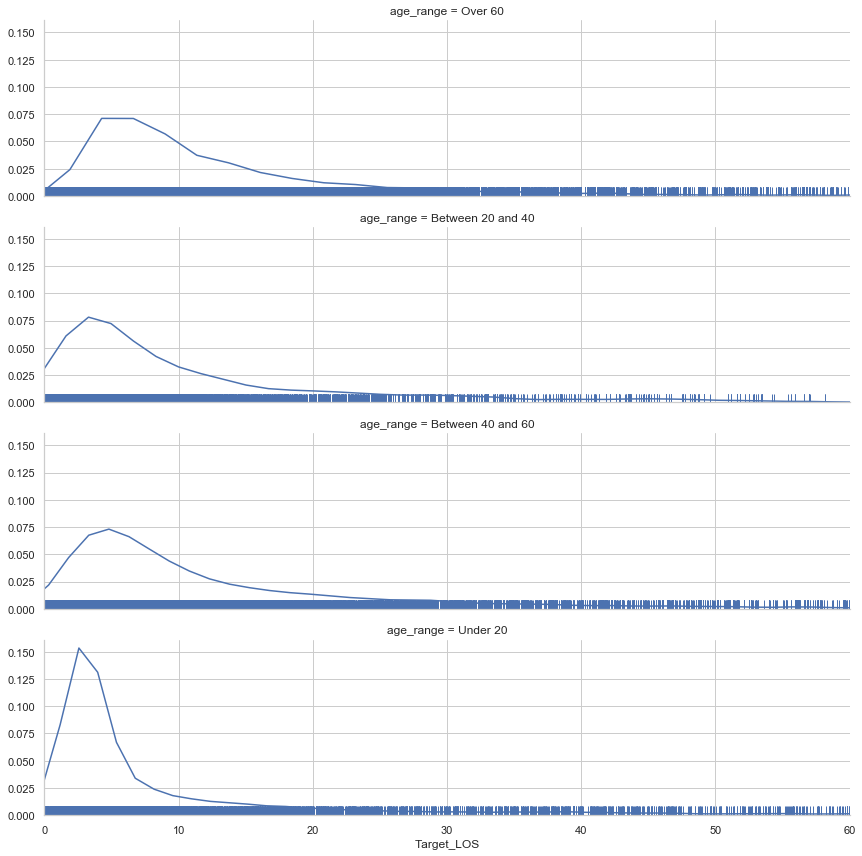

In [210]:
sns.FacetGrid(data,row='age_range',height=3,aspect=4).map(sns.distplot,'Target_LOS',hist=False,rug=True)
plt.xlim(0,60)

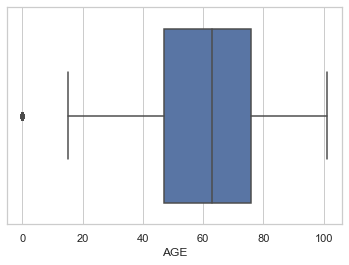

In [174]:
sns.boxplot(data = data, x = 'AGE');

In [81]:
# data.groupby('ADMISSION_TYPE').agg({'Target_LOS':
#                                    {'Count':np.sum,
#                                     'Mean':np.mean,
#                                     'Min': np.min,
#                                     'Max':np.max}})

In [10]:
# adm = data.groupby('ADMISSION_TYPE').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
#                                    Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
# ).round(3).stack().to_frame().reset_index()\
# .rename(columns={'level_1':'aggregate',0:'values'})
# adm

adm = data.groupby('ADMISSION_TYPE').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'})
adm

,Mean,Median
ADMISSION_TYPE,,
ELECTIVE,12.261,7.285
EMERGENCY,13.616,8.703
NEWBORN,11.654,4.131
URGENT,15.667,10.147


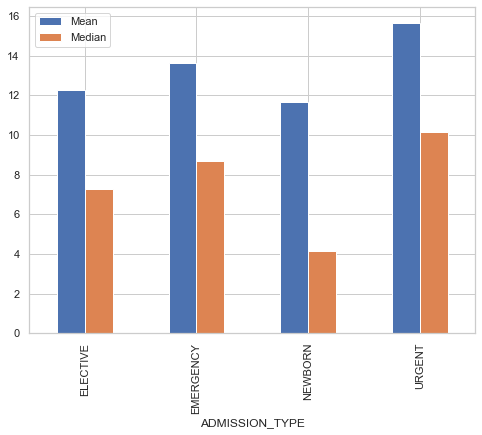

In [246]:
fig, ax = plt.subplots(figsize = (8,6))
adm.plot(kind='bar',ax=ax);

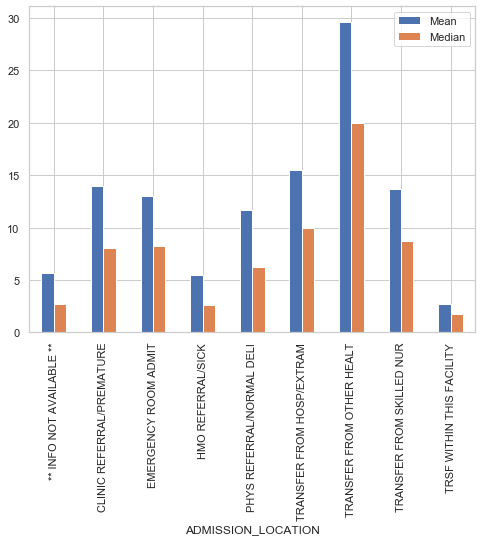

In [249]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('ADMISSION_LOCATION').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median'),
                                       ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax)

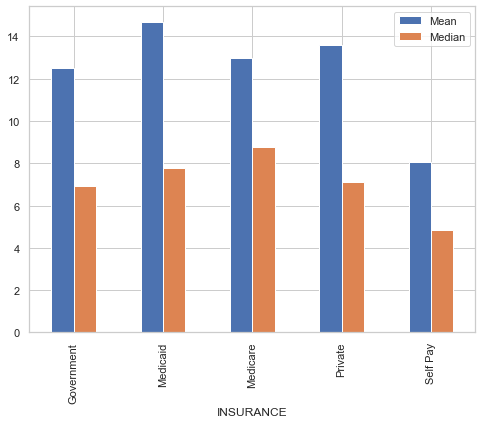

In [250]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('INSURANCE').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                              ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);

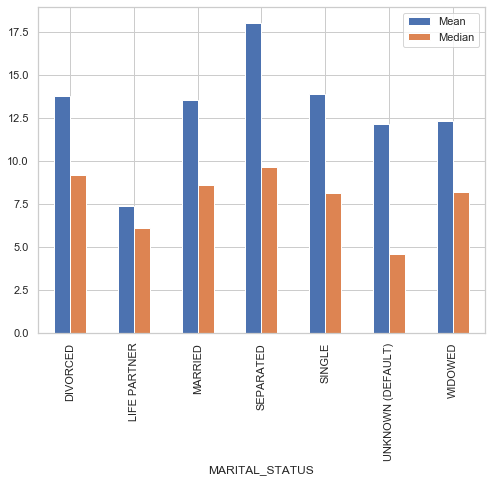

In [252]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('MARITAL_STATUS').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                                   ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);


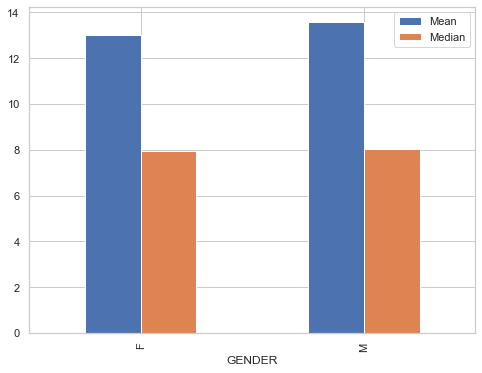

In [254]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('GENDER').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),,Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                           ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);


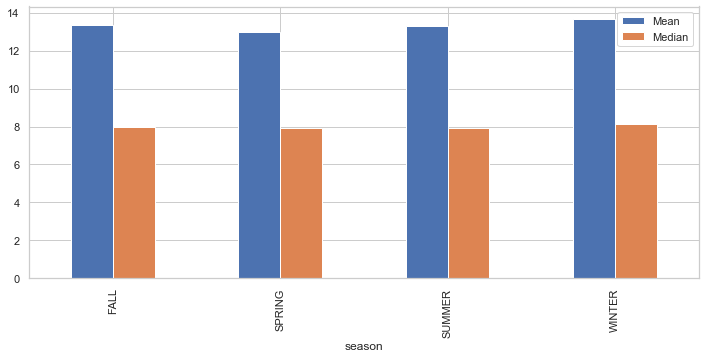

In [265]:
fig, ax = plt.subplots(figsize = (12,5))
data.groupby('season').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                           ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);

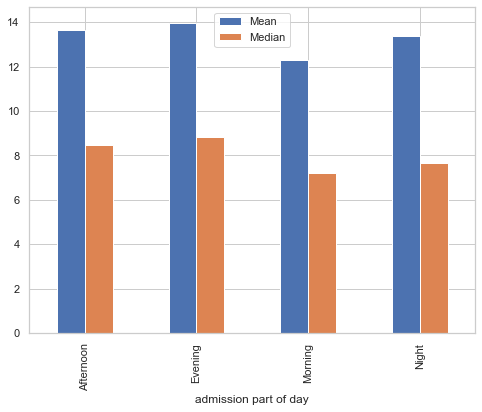

In [266]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('admission part of day').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                                          ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);

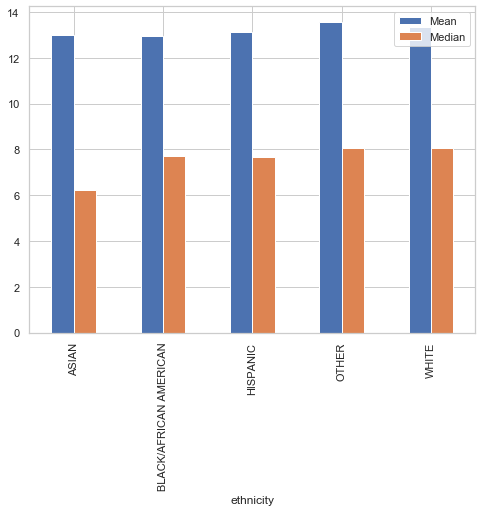

In [268]:
fig, ax = plt.subplots(figsize = (8,6))
data.groupby('ethnicity').agg(#Min=('Target_LOS','min'),Max=('Target_LOS','max'),Count =('Target_LOS','count')
                                   Mean = ('Target_LOS','mean'),Median = ('Target_LOS','median')
                              ).round(3)\
.rename(columns={'level_1':'aggregate',0:'values'}).plot(kind='bar',ax=ax);

In [269]:
data

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity,age_range
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE,Over 60
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE,Over 60
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE,Over 60
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE,Between 20 and 40
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE,Between 40 and 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78,FALL,Morning,WHITE,Over 60
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88,WINTER,Evening,WHITE,Over 60
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19,SPRING,Evening,WHITE,Under 20
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,84,SPRING,Evening,WHITE,Over 60


(0, 45)

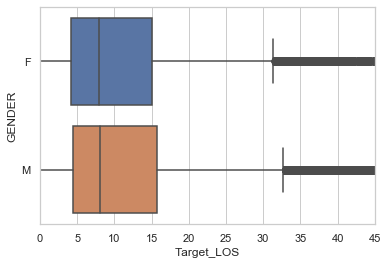

In [283]:
sns.set_style("whitegrid") 

sns.boxplot(y = 'GENDER', x = 'Target_LOS', data = data)
plt.xlim(0,45)


In [11]:
data.drop(columns=['age_range'])

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78,FALL,Morning,WHITE
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88,WINTER,Evening,WHITE
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19,SPRING,Evening,WHITE
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,84,SPRING,Evening,WHITE


In [287]:
data_dummied = pd.get_dummies(data,drop_first=True)

In [324]:
#split data
X = data_dummied.drop(columns='Target_LOS')

y = data_dummied[['Target_LOS']]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

//anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [325]:
#split into train test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,random_state = 321)

In [337]:
#initial check of models
models = [#SGDRegressor(random_state=321),
         GradientBoostingRegressor(random_state=321),
         LinearRegression(),
         KNeighborsRegressor(),
         RandomForestRegressor(random_state=321)]

outcome = {}

for model in models:
    #fit models
    model.fit(X_train,y_train)
    
    #predict models
    y_pred = model.predict(X_test)
    
    #grab the model name
    name = str(model).split('(')[0]
    
    outcome[name] = r2_score(y_test,y_pred)
    print('{} done'.format(name))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor done
LinearRegression done
KNeighborsRegressor done


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RandomForestRegressor done


In [338]:
outcome.values()

dict_values([0.12432270216887453, 0.06540562325645094, 0.3873368425657111, 0.5023067050037757])

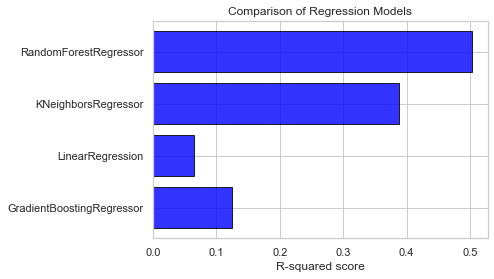

In [344]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(outcome))
ax.barh(ind, list(outcome.values()), align='center', 
        color = 'blue', alpha=0.8,edgecolor = 'black')
ax.set_yticks(ind)
ax.set_yticklabels(outcome.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models');

In [359]:
rf = RandomForestRegressor(random_state=321)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test,y_pred)
error = abs(y_pred - y_test['Target_LOS'])
print('r2 score:',r2)
print('Mean Absolute Error:',round(np.mean(error),2))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


r2 score: 0.5023067050037757
Mean Absolute Error: 7.0


In [3]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [346]:
param_grid = {'n_estimators' : [10, 50, 100, 250],
             'max_depth' : [2, 3, 4, 5, 8, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf' : [1, 5, 10],
             'max_features' : ['auto', 'sqrt', 'log2']}

In [372]:
rf_model = RandomForestRegressor(random_state=321)
gs = GridSearchCV(rf_model, param_grid = param_grid, #for the kaggle you would want F1 score.i.e. scoring ='F1'
                   n_jobs=-1, verbose=5, cv=5)#n_jobs = -1 keep it. cv=5 means chop it up to 5 pieces

In [373]:
#train
gs.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 31.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 335.9min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 563.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 673.8min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 902.7min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 913.5min finished
//anaconda3/lib/python3.7/site-pac

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=321,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [382]:
gs_best_estimator = gs.best_estimator_
print(gs.best_score_)
print(gs.best_estimator_)

0.5482596597504581
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=321, verbose=0, warm_start=False)


In [374]:
gs.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [376]:
y_pred = gs.predict(X_test)

In [377]:
r2 = r2_score(y_test,y_pred)
error = abs(y_pred - y_test['Target_LOS'])
print('r2 score:',r2)
print('Mean Absolute Error:',round(np.mean(error),2))

r2 score: 0.5543443277224814
Mean Absolute Error: 6.57


In [397]:
feature_importance = pd.DataFrame(gs_best_estimator.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['importance']).sort_values('importance', ascending = False)
feature_importance.tail(20)

,importance
CURR_SERVICE_Genitourinary,0.001349
ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,0.001308
CURR_SERVICE_Other,0.001208
RELIGION_JEHOVAH'S WITNESS,0.001081
RELIGION_MUSLIM,0.001018
"CURR_SERVICE_Ear, nose, and throat",0.000715
LANGUAGE_MAND,0.000660
RELIGION_UNITARIAN-UNIVERSALIST,0.000630
LANGUAGE_ITAL,0.000609
RELIGION_HINDU,0.000563


In [386]:
feature_importance.index[0:10].tolist()

['AGE',
 'GENDER_M',
 'season_WINTER',
 'admission part of day_Night',
 'season_SPRING',
 'season_SUMMER',
 'admission part of day_Evening',
 'admission part of day_Morning',
 'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
 'INSURANCE_Private']

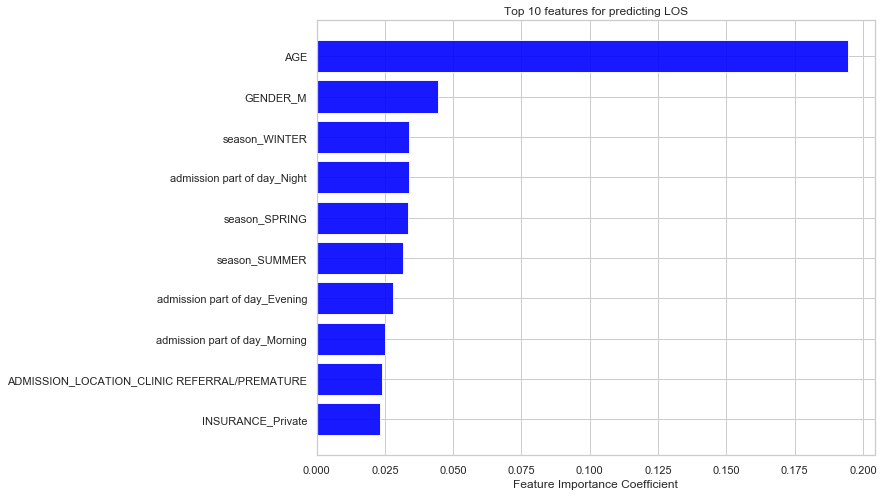

In [390]:
#plot feature importance
fig, ax = plt.subplots(figsize =(10,8))
ind =range(0,10)
ax.barh(ind,feature_importance['importance'].values[0:10],
       align = 'center', color = 'blue',alpha = 0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_importance.index[0:10].tolist())
ax.tick_params(left=False,top=False,right=False)
ax.set_title('Top 10 features for predicting LOS')
ax.set_xlabel('Feature Importance Coefficient')
plt.gca().invert_yaxis()


In [528]:
data

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity,age_range,LOS_cat
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE,Over 60,1 week
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE,Over 60,1 week
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE,Over 60,1 week
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE,Between 20 and 40,1 week
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE,Between 40 and 60,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78,FALL,Morning,WHITE,Over 60,1 week
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88,WINTER,Evening,WHITE,Over 60,1 week
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19,SPRING,Evening,WHITE,Under 20,1 week
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,84,SPRING,Evening,WHITE,Over 60,1 week


In [12]:
def LOC_cat(a):
    if a < 7:
        return '1 week'
    elif a >=7 and a <21:
        return '3 weeks'
    elif a >=21:
        return 'longer than 3 weeks'
    
data['LOS_cat'] = data['Target_LOS'].apply(LOC_cat)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
data

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity,age_range,LOS_cat
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,65,SPRING,Morning,WHITE,Over 60,1 week
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71,FALL,Morning,WHITE,Over 60,1 week
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75,FALL,Evening,WHITE,Over 60,1 week
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39,SUMMER,Afternoon,WHITE,Between 20 and 40,1 week
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,59,FALL,Night,WHITE,Between 40 and 60,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78,FALL,Morning,WHITE,Over 60,1 week
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88,WINTER,Evening,WHITE,Over 60,1 week
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19,SPRING,Evening,WHITE,Under 20,1 week
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,84,SPRING,Evening,WHITE,Over 60,1 week


In [14]:
data.LOS_cat.value_counts()

1 week                 34676
3 weeks                30927
longer than 3 weeks    13100
Name: LOS_cat, dtype: int64

In [15]:
data_cat = data.copy()

In [16]:
data_cat = data_cat.drop(columns=['age_range','Target_LOS'])
data_cat

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,AGE,season,admission part of day,ethnicity,LOS_cat
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,65,SPRING,Morning,WHITE,1 week
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,71,FALL,Morning,WHITE,1 week
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,75,FALL,Evening,WHITE,1 week
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,39,SUMMER,Afternoon,WHITE,1 week
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,59,FALL,Night,WHITE,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,78,FALL,Morning,WHITE,1 week
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,88,WINTER,Evening,WHITE,1 week
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,19,SPRING,Evening,WHITE,1 week
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,84,SPRING,Evening,WHITE,1 week


# Classification model

In [17]:
data_cat

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,AGE,season,admission part of day,ethnicity,LOS_cat
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,65,SPRING,Morning,WHITE,1 week
1,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,71,FALL,Morning,WHITE,1 week
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,75,FALL,Evening,WHITE,1 week
3,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,39,SUMMER,Afternoon,WHITE,1 week
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,59,FALL,Night,WHITE,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,78,FALL,Morning,WHITE,1 week
78747,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,88,WINTER,Evening,WHITE,1 week
78748,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,19,SPRING,Evening,WHITE,1 week
78749,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,84,SPRING,Evening,WHITE,1 week


In [18]:
columns_to_dummy = data_cat.drop(columns=['LOS_cat','AGE']).columns.to_list()
data_cat = pd.get_dummies(data_cat,drop_first=True,columns=columns_to_dummy)

In [19]:
data_cat

,AGE,LOS_cat,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,...,season_SPRING,season_SUMMER,season_WINTER,admission part of day_Evening,admission part of day_Morning,admission part of day_Night,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC,ethnicity_OTHER,ethnicity_WHITE
0,65,1 week,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,71,1 week,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,75,1 week,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,39,1 week,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,59,1 week,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,78,1 week,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
78747,88,1 week,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
78748,19,1 week,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
78749,84,1 week,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [537]:
#split data
X = data_cat.drop(columns='LOS_cat')

y = data_cat[['LOS_cat']]

In [538]:
#split into train test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,random_state = 321)

In [539]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()

In [540]:
rf_class.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [544]:
accuracy_score(y_train, rf_class.predict(X_train))

0.9683257097219197

In [545]:
#large gaps(i.e. train =.97 and test = .62) mean your model is overftting to your training model 
y_pred = rf_class.predict(X_test)
accuracy_score(y_test,y_pred)

0.6269111854644022

In [546]:
param_grid = {'n_estimators' : [50, 100, 250],
             'max_depth' : [2, 3, 4, 5, 8, None],
             'min_samples_split': [2, 5, 10],
             'max_features' : ['auto', 'sqrt', 'log2']}

In [547]:
rf_model = RandomForestClassifier()
gs = RandomizedSearchCV(rf_model, param_distributions=param_grid,
                  scoring = 'accuracy', n_jobs=-1, verbose=5, cv=5)

In [548]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [549]:
gs_best_estimator = gs.best_estimator_
print(gs.best_score_)
print(gs.best_estimator_)

0.5082952116685002
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [550]:
gs.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 8}

In [551]:
y_pred = gs.predict(X_test)

In [552]:
accuracy_score(y_train, gs.predict(X_train))

0.5226530167719451

In [553]:
accuracy_score(y_test, y_pred)

0.5162847825166236

In [46]:
import lightgbm as lgb

//anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [555]:
# fit a lightGBM model to the data
lgb_model = lgb.LGBMClassifier()

In [556]:
lgb_model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [557]:
# make predictions
#expected_y  = y_test
predicted_y = lgb_model.predict(X_test)

In [558]:
accuracy_score(y_train, lgb_model.predict(X_train))

0.5689392289261599

In [559]:
accuracy_score(y_test,predicted_y)

0.5393672440811487

In [20]:
data_01 = pd.read_csv('data/los_data.csv')

In [21]:
data_01

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,GENDER,Target_LOS,AGE,season,admission part of day,ethnicity
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,F,1.144444,64.969863,SPRING,Morning,WHITE
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,M,5.496528,71.178082,FALL,Morning,WHITE
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,M,6.768056,75.304110,FALL,Evening,WHITE
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,M,2.856944,39.041096,SUMMER,Afternoon,WHITE
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,M,3.534028,58.989041,FALL,Night,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,M,4.145833,78.326027,FALL,Morning,WHITE
78747,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,M,0.662500,88.049315,WINTER,Evening,WHITE
78748,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,F,2.742361,19.410959,SPRING,Evening,WHITE
78749,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,F,0.548611,83.506849,SPRING,Evening,WHITE


In [22]:
diagnoses = pd.read_csv('data/DIAGNOSES_ICD.csv')

In [23]:
diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
ROW_ID        651047 non-null int64
SUBJECT_ID    651047 non-null int64
HADM_ID       651047 non-null int64
SEQ_NUM       651000 non-null float64
ICD9_CODE     651000 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [24]:
diagnoses['ICD9_CODE'].value_counts().count()

6984

In [25]:
diagnoses['code'] = diagnoses['ICD9_CODE']

In [26]:
diagnoses['code']=diagnoses['code'][~diagnoses['code'].str.contains("[a-zA-Z]").fillna(False)]

In [27]:
diagnoses['code']=diagnoses['code'].fillna(value='000')
#diagnoses['code']=diagnoses['code'].astype(int)

In [28]:
#gives me just the first 3 numbers 
diagnoses['code']=diagnoses['code'].str.slice(start=0,stop=3,step=1)
diagnoses['code']=diagnoses['code'].astype(int)


In [29]:
def code(ds):
    if ds >0 and ds <=139:
        return 'Infectious'
    elif ds>=140 and ds<=239:
        return 'Neoplasms'
    elif ds>=240 and ds<=279:
        return 'Endocrine'
    elif ds>=280 and ds <=289:
        return 'Blood'
    elif ds>=290 and ds <= 319:
        return 'Mental'
    elif ds>=320 and ds<=389:
        return 'Nervous'
    elif ds>=390 and ds<=459:
        return 'Circulatory'
    elif ds >=460 and ds<=519:
        return 'Respiratory'
    elif ds>=520 and ds<=579:
        return 'Digestive'
    elif ds>= 580 and ds<=629:
        return 'Genitourinary'
    elif ds>= 630 and ds<=679:
        return 'Pregnancy'
    elif ds >=680 and ds<= 709:
        return 'Skin'
    elif ds>=710 and ds<=739:
        return 'Muscular'
    elif ds>=740 and ds<=759:
        return 'Congenital'
    elif ds>= 760 and ds<=779:
        return 'prenatal'
    elif ds>=780 and ds<=799:
        return 'Misc'
    elif ds>=800 and ds<=999:
        return 'Injury'
    else:
        return 'Extarnal Cause'
    
    
diagnoses['cat_code']=diagnoses['code'].apply(code)

In [30]:
diagnoses

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,code,cat_code
0,1297,109,172335,1.0,40301,403,Circulatory
1,1298,109,172335,2.0,486,486,Respiratory
2,1299,109,172335,3.0,58281,582,Genitourinary
3,1300,109,172335,4.0,5855,585,Genitourinary
4,1301,109,172335,5.0,4254,425,Circulatory
...,...,...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280,202,Neoplasms
651043,639799,97503,188195,3.0,V5869,0,Extarnal Cause
651044,639800,97503,188195,4.0,V1279,0,Extarnal Cause
651045,639801,97503,188195,5.0,5275,527,Digestive


In [31]:
#For each admission, there could be (and usually is) more than one diagnosis. Often, there are more than 1 diagnoses 
#for 1 category. Therefore, I need to create a dummy matrix that highlights all the diagnoses for each admission. 
#This should not be done on the SUBJECT_ID since each patient could have different diagnoses for each admission.
id_list = diagnoses.groupby('HADM_ID')['cat_code'].apply(list).reset_index()
id_list

,HADM_ID,cat_code
0,100001,"[Endocrine, Nervous, Genitourinary, Digestive,..."
1,100003,"[Digestive, Blood, Infectious, Digestive, Circ..."
2,100006,"[Respiratory, Respiratory, Respiratory, Neopla..."
3,100007,"[Digestive, Digestive, Injury, Respiratory, Ci..."
4,100009,"[Circulatory, Injury, Circulatory, Endocrine, ..."
...,...,...
58971,199993,"[Circulatory, Circulatory, Circulatory, Circul..."
58972,199994,"[Respiratory, Circulatory, Respiratory, Circul..."
58973,199995,"[Circulatory, Congenital, Circulatory, Mental,..."
58974,199998,"[Circulatory, Injury, Injury, Circulatory, Mis..."


In [32]:
# Convert diagnoses list into hospital admission-item matrix
dummy = pd.get_dummies(id_list['cat_code'].apply(pd.Series).stack()).sum(level=0)


In [33]:
# Join back with HADM_ID
id_list = dummy.join(id_list['HADM_ID'], how="outer")
id_list

,Blood,Circulatory,Congenital,Digestive,Endocrine,Extarnal Cause,Genitourinary,Infectious,Injury,Mental,Misc,Muscular,Neoplasms,Nervous,Pregnancy,Respiratory,Skin,prenatal,HADM_ID
0,0,2,0,2,5,2,2,0,0,0,0,0,0,2,0,0,1,0,100001
1,1,2,0,4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,100003
2,0,0,0,0,1,2,0,0,0,1,1,0,1,0,0,3,0,0,100006
3,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,100007
4,1,7,0,0,3,6,0,0,1,0,0,0,0,0,0,0,0,0,100009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,199993
58972,0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,3,0,0,199994
58973,0,4,1,0,0,1,0,1,0,3,0,0,0,0,0,0,0,0,199995
58974,0,7,0,0,2,3,0,0,2,0,1,0,0,0,0,1,0,0,199998


In [34]:
data_01 = data_01.merge(id_list,how='inner',on='HADM_ID')
data_01

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,...,Injury,Mental,Misc,Muscular,Neoplasms,Nervous,Pregnancy,Respiratory,Skin,prenatal
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,...,2,1,0,0,0,1,0,0,0,0
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,...,0,0,0,0,0,1,0,0,0,0
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,...,0,0,1,0,1,1,0,0,0,0
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,...,0,0,0,0,0,0,0,0,0,0
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,...,0,0,0,0,0,1,0,0,0,0
78747,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,...,1,0,0,0,0,2,0,1,0,0
78748,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,...,5,0,0,0,0,0,0,0,0,0
78749,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,...,0,0,0,0,0,0,0,0,0,0


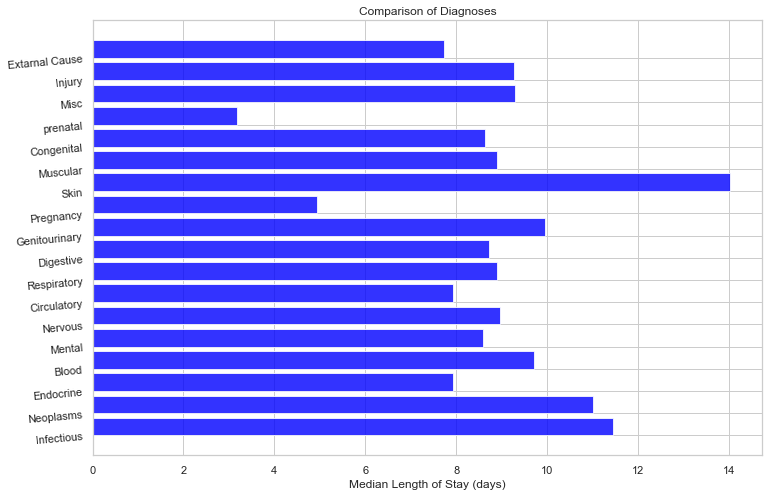

In [835]:
#look at medial los
dg_list = ['Infectious','Neoplasms','Endocrine','Blood','Mental','Nervous','Circulatory','Respiratory',
          'Digestive','Genitourinary','Pregnancy','Skin','Muscular','Congenital','prenatal','Misc',
          'Injury','Extarnal Cause']

results = []
for label in dg_list:
    results.append(data_01[[label, 'Target_LOS']].groupby(label).median().reset_index().values[1][1])
    
sns.set(style='whitegrid')
fig,ax=plt.subplots(figsize=(12,8))
ind=range(len(results))
ax.barh(ind,results,align='edge',color='blue',alpha = 0.8)
ax.set_yticks(ind)
ax.set_yticklabels(dg_list,horizontalalignment='right',rotation=5)
ax.set_xlabel('Median Length of Stay (days)')
ax.tick_params(left=False,right=False,top=False)
ax.set_title('Comparison of Diagnoses'.format(label))

plt.show();

In [35]:
data_01['LOS_cat'] = data_01['Target_LOS'].apply(LOC_cat)

In [36]:
data_01

,ROW_ID,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,CURR_SERVICE,...,Mental,Misc,Muscular,Neoplasms,Nervous,Pregnancy,Respiratory,Skin,prenatal,LOS_cat
0,21,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Medical,...,1,0,0,0,1,0,0,0,0,1 week
1,22,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NOT SPECIFIED,CATHOLIC,MARRIED,Cardiac,...,0,0,0,0,1,0,0,0,0,1 week
2,23,23,124321,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,ENGL,CATHOLIC,MARRIED,Neurologic,...,0,1,0,1,1,0,0,0,0,1 week
3,24,24,161859,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,PROTESTANT QUAKER,SINGLE,Cardiac,...,0,0,0,0,0,0,0,0,0,1 week
4,25,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,Private,NOT SPECIFIED,UNOBTAINABLE,MARRIED,Cardiac,...,0,0,0,0,0,0,0,0,0,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,58592,98794,190603,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,ENGL,CATHOLIC,MARRIED,Cardiac,...,0,0,0,0,1,0,0,0,0,1 week
78747,58593,98797,105447,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,...,0,0,0,0,2,0,1,0,0,1 week
78748,58594,98800,191113,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,NOT SPECIFIED,SINGLE,Trauma,...,0,0,0,0,0,0,0,0,0,1 week
78749,58595,98802,101071,EMERGENCY,CLINIC REFERRAL/PREMATURE,Medicare,ENGL,CATHOLIC,WIDOWED,Medical,...,0,0,0,0,0,0,0,0,0,1 week


In [37]:
data_01.columns.to_list()

['ROW_ID',
 'SUBJECT_ID',
 'HADM_ID',
 'ADMISSION_TYPE',
 'ADMISSION_LOCATION',
 'INSURANCE',
 'LANGUAGE',
 'RELIGION',
 'MARITAL_STATUS',
 'CURR_SERVICE',
 'GENDER',
 'Target_LOS',
 'AGE',
 'season',
 'admission part of day',
 'ethnicity',
 'Blood',
 'Circulatory',
 'Congenital',
 'Digestive',
 'Endocrine',
 'Extarnal Cause',
 'Genitourinary',
 'Infectious',
 'Injury',
 'Mental',
 'Misc',
 'Muscular',
 'Neoplasms',
 'Nervous',
 'Pregnancy',
 'Respiratory',
 'Skin',
 'prenatal',
 'LOS_cat']

In [38]:
data_01 =data_01.drop(columns='CURR_SERVICE')

In [39]:
data_01=data_01.drop(columns=['ROW_ID','SUBJECT_ID','HADM_ID','Target_LOS'])

In [40]:
columns = data_01[['ADMISSION_TYPE','ADMISSION_LOCATION','INSURANCE','LANGUAGE',
                 'RELIGION','MARITAL_STATUS','GENDER','season','admission part of day',
                 'ethnicity']]
columns = columns.columns.to_list()
data_01 = pd.get_dummies(data_01,drop_first=True, columns = columns)


In [41]:
data_01['AGE']=data_01['AGE'].round().astype(int)

In [42]:
data_01

,AGE,Blood,Circulatory,Congenital,Digestive,Endocrine,Extarnal Cause,Genitourinary,Infectious,Injury,...,season_SPRING,season_SUMMER,season_WINTER,admission part of day_Evening,admission part of day_Morning,admission part of day_Night,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC,ethnicity_OTHER,ethnicity_WHITE
0,65,0,1,0,0,0,2,0,0,2,...,1,0,0,0,1,0,0,0,0,1
1,71,0,4,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,75,0,2,0,0,2,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,39,0,2,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,3,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78746,78,0,1,0,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
78747,88,0,1,0,0,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
78748,19,1,0,0,0,0,1,1,0,5,...,1,0,0,1,0,0,0,0,0,1
78749,84,0,3,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [43]:
#split data
X = data_01.drop(columns='LOS_cat')

y = data_01[['LOS_cat']]

In [44]:
#split into train test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,random_state = 321)

In [846]:
rfc = RandomForestClassifier()

In [847]:
rfc.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [848]:
accuracy_score(y_train, rfc.predict(X_train))

0.9988752834467121

In [849]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7737238635401676

In [891]:
#hyperparameter tuning
param_grid = {'n_estimators' : [50, 100, 250],
             'max_depth' : [2, 3, 4, 5, 8, None],
             'min_samples_split': [2, 5, 10],
             'max_features' : ['auto', 'sqrt', 'log2']}

In [892]:
rf_pp = RandomForestClassifier()
gs_pp = RandomizedSearchCV(rf_pp, param_distributions=param_grid,
                  scoring = 'accuracy', n_jobs=-1, verbose=5, cv=5)

In [893]:
gs_pp.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.5min finished
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [894]:
y_pred = gs_pp.predict(X_test)

In [895]:
#train
accuracy_score(y_train, gs_pp.predict(X_train))

0.9902766439909297

In [896]:
#test
accuracy_score(y_test, y_pred)

0.773808516041649

In [897]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

             1 week       0.78      0.81      0.79     10392
            3 weeks       0.71      0.74      0.73      9217
longer than 3 weeks       0.93      0.76      0.83      4017

           accuracy                           0.77     23626
          macro avg       0.81      0.77      0.79     23626
       weighted avg       0.78      0.77      0.77     23626



In [898]:
gs_p_best_estimator = gs_p.best_estimator_

In [899]:
top_features = pd.DataFrame(gs_p_best_estimator.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['importance']).sort_values('importance', ascending = False)
top_features.head(20)

,importance
AGE,0.078954
Respiratory,0.056638
Circulatory,0.056024
Injury,0.052229
Extarnal Cause,0.041735
Digestive,0.039840
Infectious,0.038371
Endocrine,0.036148
Genitourinary,0.030895
Misc,0.028469


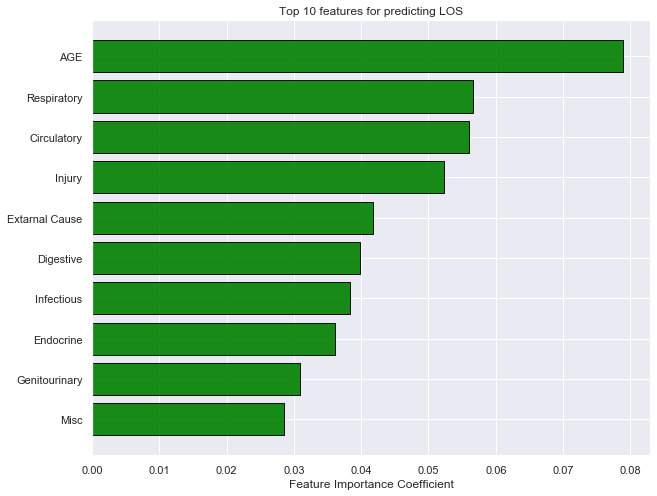

In [925]:
#plot feature importance
fig, ax = plt.subplots(figsize =(10,8))
ind =range(0,10)
ax.barh(ind,top_features['importance'].values[0:10],
       align = 'center', color = 'green',alpha = 0.9,edgecolor='black')
ax.set_yticks(ind)
ax.set_yticklabels(top_features.index[0:10].tolist())
ax.tick_params(left=False,top=False,right=False)
ax.set_title('Top 10 features for predicting LOS')
ax.set_xlabel('Feature Importance Coefficient')
sns.set(font_scale = 1)
plt.gca().invert_yaxis()

In [47]:
lgb_class = lgb.LGBMClassifier()

In [48]:
lgb_class.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [49]:
y_predict = lgb_class.predict(X_test)

In [52]:
#train
accuracy_score(y_train,lgb_class.predict(X_train))

0.6852063492063492

In [53]:
#test
accuracy_score(y_test,y_predict)

0.6502581901295184

In [54]:
print(classification_report(y_test, y_predict))

                     precision    recall  f1-score   support

             1 week       0.71      0.72      0.71     10392
            3 weeks       0.57      0.62      0.59      9217
longer than 3 weeks       0.74      0.54      0.63      4017

           accuracy                           0.65     23626
          macro avg       0.67      0.63      0.64     23626
       weighted avg       0.66      0.65      0.65     23626



In [55]:
import shap

In [56]:
feature_imp = pd.DataFrame(sorted(zip(lgb_class.feature_importances_,X.columns)),columns=['Value','Feature']).sort_values(by='Value',ascending=False)

In [57]:
feature_imp = feature_imp[0:10]


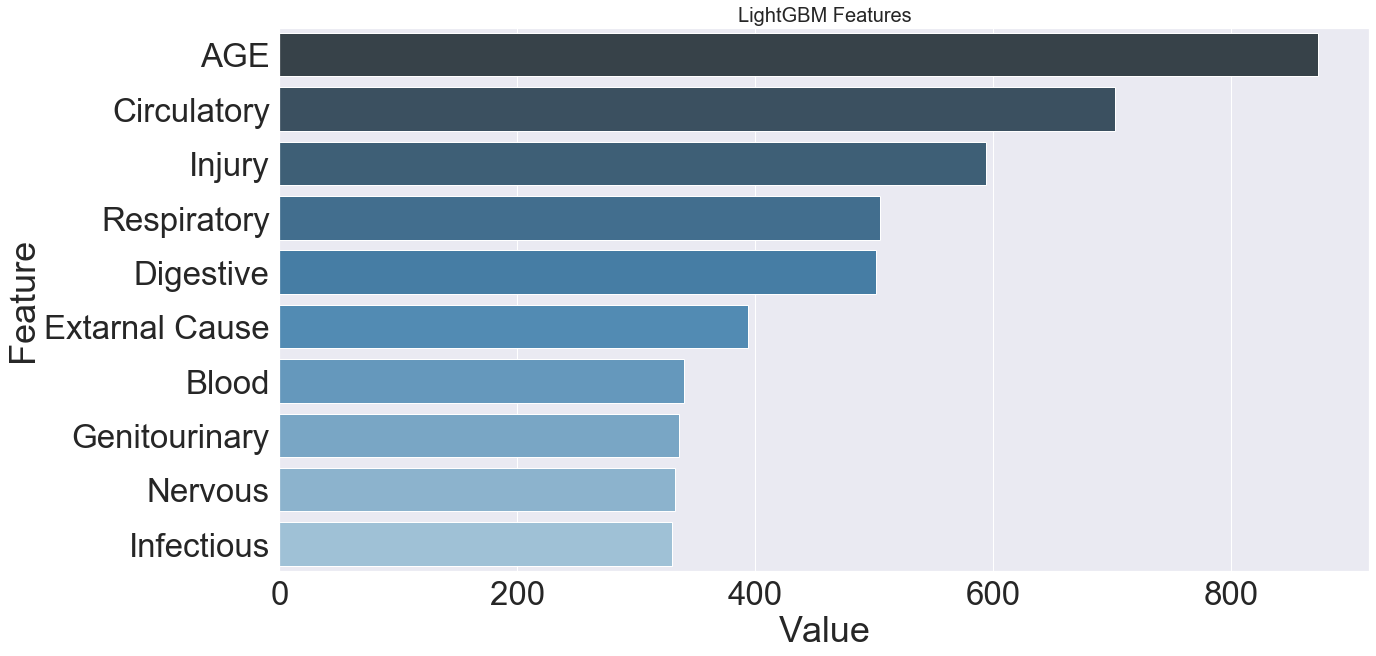

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(x='Value',y='Feature',data=feature_imp.sort_values(by='Value',ascending=False),palette="Blues_d")
plt.title('LightGBM Features',size=20)
plt.tight_layout()
sns.set(font_scale = 2)
plt.show()

In [65]:
shap.initjs()

In [72]:
shap_values = shap.TreeExplainer(lgb_class).shap_values(X)

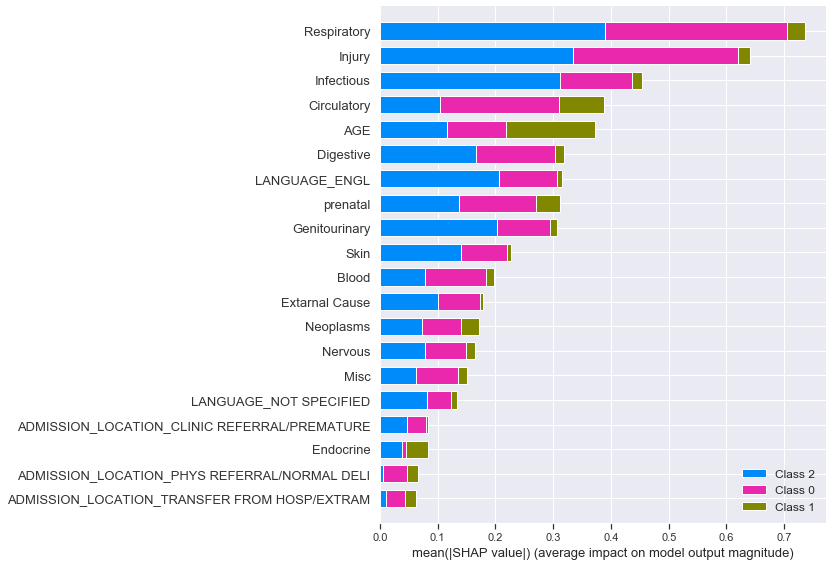

In [73]:
sum_plot = shap.summary_plot(shap_values, X)

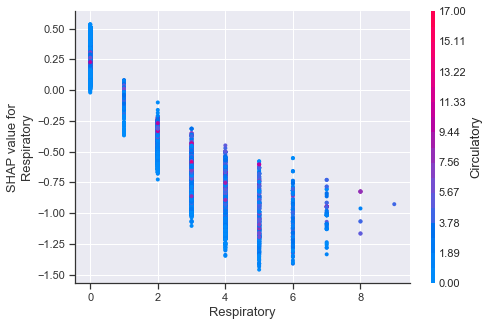

In [75]:
shap.dependence_plot("Respiratory",shap_values[0], X)

In [ ]:
shap.dependence_plot("EXT_SOURCE_2", shap_values, valid_x)